In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv("/content/Bank Customer-Churn.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [3]:
df.columns=df.columns.str.lower()
df.head(5)

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,complain,satisfaction score,card type,point earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['geography']=le.fit_transform(df['geography'])
df['gender']=le.fit_transform(df['gender'])
df['card type']=le.fit_transform(df['card type'])



<Axes: xlabel='point earned'>

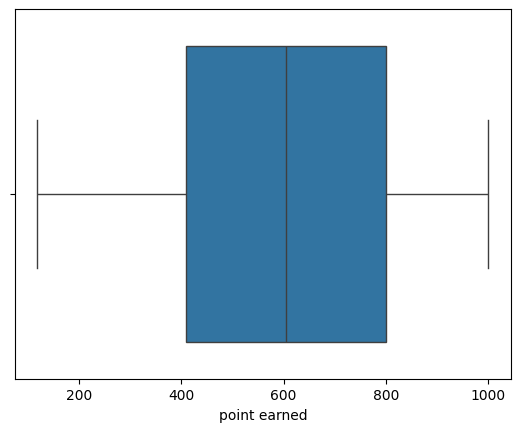

In [5]:
sns.boxplot(df,x='point earned')

In [6]:
Q1 = df['creditscore'].quantile(0.25)
Q3 = df['creditscore'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print("Lower bound:", lower)
print("Upper bound:", upper)
df['creditscore'] = df['creditscore'].clip(lower=lower, upper=upper)
df

Lower bound: 383.0
Upper bound: 919.0


,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,complain,satisfaction score,card type,point earned
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,2,0,464
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,5,1,350
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,1,39,5,0.00,2,1,0,96270.64,0,0,1,0,300
9996,9997,15569892,Johnstone,516,0,1,35,10,57369.61,1,1,1,101699.77,0,0,5,2,771
9997,9998,15584532,Liu,709,0,0,36,7,0.00,1,0,1,42085.58,1,1,3,3,564
9998,9999,15682355,Sabbatini,772,1,1,42,3,75075.31,2,1,0,92888.52,1,1,2,1,339


In [7]:
df.isnull().sum()

,0
rownumber,0
customerid,0
surname,0
creditscore,0
geography,0
gender,0
age,0
tenure,0
balance,0
numofproducts,0


In [8]:
df

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,complain,satisfaction score,card type,point earned
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,2,0,464
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,5,1,350
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,1,39,5,0.00,2,1,0,96270.64,0,0,1,0,300
9996,9997,15569892,Johnstone,516,0,1,35,10,57369.61,1,1,1,101699.77,0,0,5,2,771
9997,9998,15584532,Liu,709,0,0,36,7,0.00,1,0,1,42085.58,1,1,3,3,564
9998,9999,15682355,Sabbatini,772,1,1,42,3,75075.31,2,1,0,92888.52,1,1,2,1,339


In [9]:
import pandas as pd

# Reload fresh dataset
df = pd.read_csv("/content/Bank Customer-Churn.csv")

# 1️⃣ Drop identifier / string columns (MANDATORY)
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

# 2️⃣ Define x and y (small letters, consistent)
y = df["Exited"]
x = df.drop("Exited", axis=1)

# 3️⃣ Encode categorical columns
x = pd.get_dummies(x, drop_first=True)

# 4️⃣ Convert True/False → 0/1 (CRITICAL)
bool_cols = x.select_dtypes(include="bool").columns
x[bool_cols] = x[bool_cols].astype(int)

# 5️⃣ Train–test split (do this ONLY ONCE)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,              # limit tree depth
    min_samples_split=20,     # avoid tiny splits
    min_samples_leaf=10,      # smooth leaves
    max_features='sqrt',      # regularization
    ccp_alpha=0.002,          # pruning
    random_state=42
)

dtc.fit(x_train, y_train)

y_pred = dtc.predict(x_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Training :", dtc.score(x_train, y_train))
print("Testing  :", dtc.score(x_test, y_test))


Accuracy : 0.9276
Training : 0.9282666666666667
Testing  : 0.9276


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    min_samples_split=20,
    min_samples_leaf=10,
    max_features='sqrt',
    ccp_alpha=0.002,
    random_state=42
)

dtc.fit(x_train, y_train)

y_pred = dtc.predict(x_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Training :", dtc.score(x_train, y_train))
print("Testing  :", dtc.score(x_test, y_test))


Accuracy : 0.9276
Training : 0.9282666666666667
Testing  : 0.9276


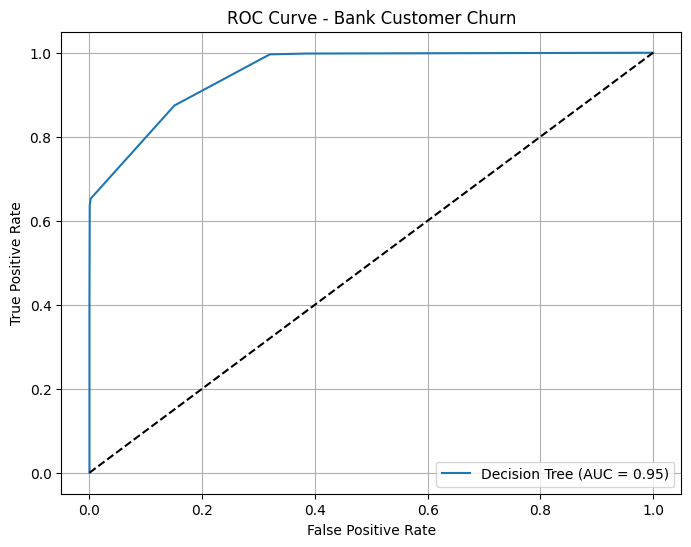

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities
y_prob = dtc.predict_proba(x_test)[:, 1]

# ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Bank Customer Churn")
plt.legend()
plt.grid()
plt.show()


In [16]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)

# 1️⃣ Final predictions
y_test_pred = dtc.predict(x_test)
y_test_prob = dtc.predict_proba(x_test)[:, 1]

# 2️⃣ Accuracy
acc = accuracy_score(y_test, y_test_pred)

# 3️⃣ Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

# 4️⃣ Classification Report
report = classification_report(y_test, y_test_pred)

# 5️⃣ ROC–AUC
auc = roc_auc_score(y_test, y_test_prob)

# 6️⃣ Display everything cleanly
print("===== MODEL EVALUATION RESULTS =====\n")
print(f"Accuracy      : {acc:.4f}")
print(f"ROC–AUC Score : {auc:.4f}\n")

print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(report)


===== MODEL EVALUATION RESULTS =====

Accuracy      : 0.9276
ROC–AUC Score : 0.9523

Confusion Matrix:
[[1987    4]
 [ 177  332]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1991
           1       0.99      0.65      0.79       509

    accuracy                           0.93      2500
   macro avg       0.95      0.83      0.87      2500
weighted avg       0.93      0.93      0.92      2500



In [20]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [21]:
import pandas as pd

# 🔹 New customer sample (partial input is OK)
new_sample_df = pd.DataFrame([{
    'CreditScore': 650,
    'Age': 42,
    'Balance': 72000.0,
    'NumOfProducts': 2,
    'IsActiveMember': 1,
    'EstimatedSalary': 68000.0,
    'Gender_Male': 1,
    'Geography_Germany': 0,
    'Geography_Spain': 1
}])

# 🔹 Add missing columns from training data
for col in x.columns:
    if col not in new_sample_df.columns:
        new_sample_df[col] = 0

# 🔹 Reorder columns to match training exactly
new_sample_df = new_sample_df[x.columns]


In [22]:
prediction = dtc.predict(new_sample_df)
probability = dtc.predict_proba(new_sample_df)

label_map = {
    0: "Customer Will Stay",
    1: "Customer Will Exit"
}

print("Predicted Class :", label_map[prediction[0]])
print("Exit Probability:", round(probability[0][1], 4))


Predicted Class : Customer Will Stay
Exit Probability: 0.0003


In [13]:
import joblib

joblib.dump(dtc, "churn_model.pkl")
joblib.dump(x.columns.tolist(), "model_columns.pkl")


['model_columns.pkl']